In [1]:
#

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# get historical daily price
symbol = 'SPY'
tick = yf.Ticker(symbol)
history = tick.history(period="max")

In [8]:

df=pd.DataFrame()
df['price'] = history.Close
df['pct_chg'] = df.price.pct_change()
# log return computation
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))
df['ret_mean'] = df.log_ret.rolling(21).mean()
# https://en.wikipedia.org/wiki/Volatility_(finance) "annualized vol" but looking back only 21 days
df['hist_volatility'] = df.log_ret.rolling(21).std()*np.sqrt(252)*100
df['dvol'] = df.hist_volatility.pct_change()
df['dvol_mean'] = df.dvol.rolling(21).mean()
df = df.dropna()

In [18]:
the_vol_mean = df.hist_volatility.mean()
the_vol_std = df.hist_volatility.std()
print(f'mean of hist_volatility {the_vol_mean:1.5f}')
the_ret_mean = df.ret_mean.mean()
the_ret_std = df.ret_mean.std()
print(f'mean of rolling mean {the_ret_mean:1.5f}')
the_dvol_mean = df.dvol_mean.mean()
the_dvol_std = df.dvol_mean.std()
print(f'mean of dvol mean {the_dvol_mean:1.5f}')

mean of hist_volatility 15.97371
mean of rolling mean 0.00038
mean of dvol mean 0.00239


price              379.916992
pct_chg              0.002155
log_ret              0.002153
ret_mean             0.001440
hist_volatility     10.754336
dvol                -0.000903
dvol_mean           -0.005785
Name: 2021-01-08 00:00:00, dtype: float64


Text(0, 0.5, 'rolling mean of daily price return')

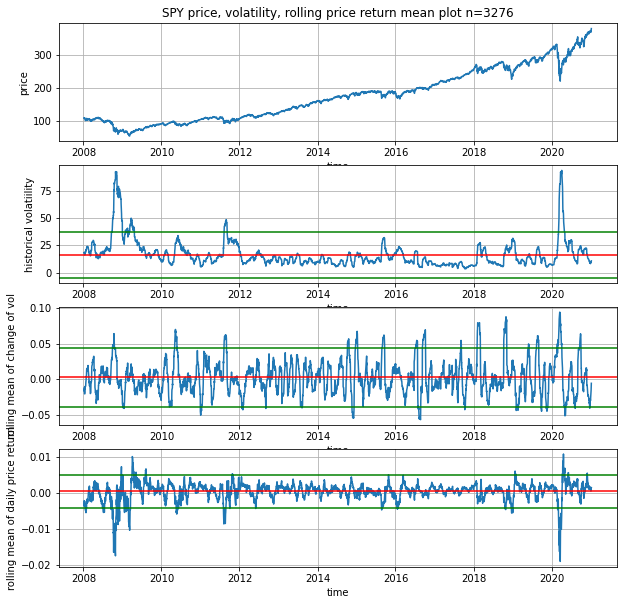

In [22]:
ind = -252*13
plt.figure(0,figsize=(10,10))
print(df.iloc[-1,:])
plt.subplot(411)
plt.plot(df.iloc[ind:].price)
plt.title(f'{symbol} price, volatility, rolling price return mean plot n={np.abs(ind)}')
plt.xlabel('time')
plt.ylabel('price')
plt.grid(True)

plt.subplot(412)
plt.plot(df.iloc[ind:].hist_volatility)
plt.axhline(the_vol_mean,color='red')
plt.axhline(the_vol_mean-2*the_vol_std,color='green')
plt.axhline(the_vol_mean+2*the_vol_std,color='green')
plt.xlabel('time')
plt.ylabel('historical volatiility')
plt.grid(True)


plt.subplot(413)
plt.plot(df.iloc[ind:].dvol_mean)
plt.axhline(the_dvol_mean,color='red')
plt.axhline(the_dvol_mean-2*the_dvol_std,color='green')
plt.axhline(the_dvol_mean+2*the_dvol_std,color='green')
plt.xlabel('time')
plt.ylabel('rolling mean of change of vol')
plt.grid(True)

plt.subplot(414)
plt.plot(df.iloc[ind:].ret_mean)
plt.axhline(the_ret_mean,color='red')
plt.axhline(the_ret_mean-2*the_ret_tsd,color='green')
plt.axhline(the_ret_mean+2*the_ret_tsd,color='green')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('rolling mean of daily price return')

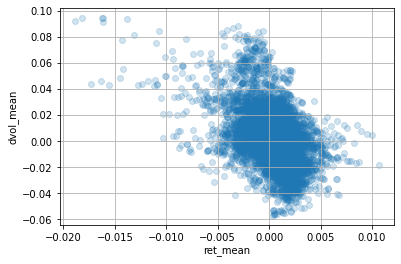

In [26]:
plt.scatter(df.ret_mean,df.dvol_mean,alpha=0.2)
plt.xlabel('ret_mean')
plt.ylabel('dvol_mean')
plt.grid(True)

price              379.916992
pct_chg              0.002155
log_ret              0.002153
ret_mean             0.001440
hist_volatility     10.754336
dvol                -0.000903
dvol_mean           -0.005785
Name: 2021-01-08 00:00:00, dtype: float64


Text(0, 0.5, 'rolling mean of daily price return')

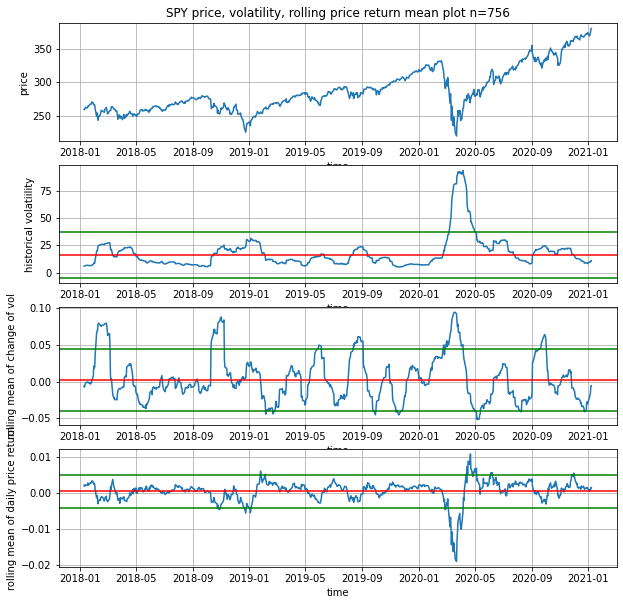

In [28]:
ind = -252*3
plt.figure(0,figsize=(10,10))
print(df.iloc[-1,:])
plt.subplot(411)
plt.plot(df.iloc[ind:].price)
plt.title(f'{symbol} price, volatility, rolling price return mean plot n={np.abs(ind)}')
plt.xlabel('time')
plt.ylabel('price')
plt.grid(True)

plt.subplot(412)
plt.plot(df.iloc[ind:].hist_volatility)
plt.axhline(the_vol_mean,color='red')
plt.axhline(the_vol_mean-2*the_vol_std,color='green')
plt.axhline(the_vol_mean+2*the_vol_std,color='green')
plt.xlabel('time')
plt.ylabel('historical volatiility')
plt.grid(True)


plt.subplot(413)
plt.plot(df.iloc[ind:].dvol_mean)
plt.axhline(the_dvol_mean,color='red')
plt.axhline(the_dvol_mean-2*the_dvol_std,color='green')
plt.axhline(the_dvol_mean+2*the_dvol_std,color='green')
plt.xlabel('time')
plt.ylabel('rolling mean of change of vol')
plt.grid(True)

plt.subplot(414)
plt.plot(df.iloc[ind:].ret_mean)
plt.axhline(the_ret_mean,color='red')
plt.axhline(the_ret_mean-2*the_ret_tsd,color='green')
plt.axhline(the_ret_mean+2*the_ret_tsd,color='green')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('rolling mean of daily price return')